In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000861842"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000861842
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,CATHAY GENERAL BANCORP
Ticker,CATY


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,49.0,1.969143e+01,3.665693e+00,14.13,1.649000e+01,1.962000e+01,2.215000e+01,2.692000e+01
interest income,52.0,1.235061e+08,2.944516e+07,35570000.00,1.062620e+08,1.212040e+08,1.393610e+08,1.877610e+08
net income,53.0,2.910813e+07,2.192315e+07,-35124000.00,2.156800e+07,3.050900e+07,3.848300e+07,7.366400e+07
net interest income,49.0,8.217661e+07,3.682595e+07,-4203000.00,6.523700e+07,8.196200e+07,1.038240e+08,1.465840e+08
provision for loan losses,52.0,1.012500e+07,2.449386e+07,-10500000.00,-1.625000e+06,0.000000e+00,7.875000e+06,9.100000e+07


# Plots

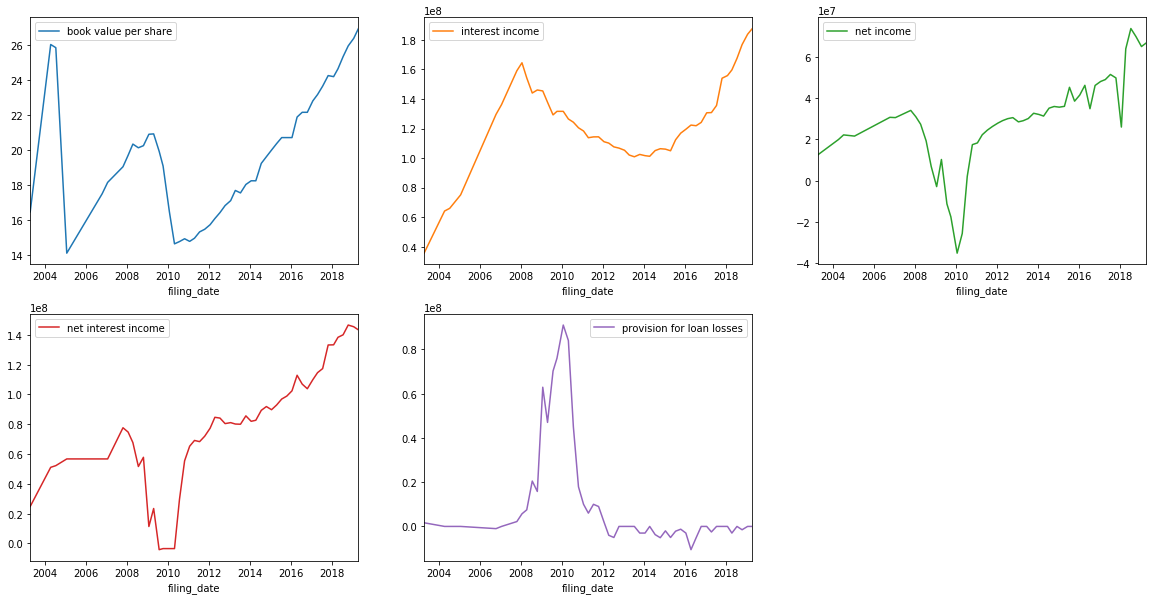

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000861842 book value per share        2003Q2 to 2003Q4: 3 periods  missing   
           book value per share                             2004Q3  missing   
           book value per share        2005Q1 to 2006Q2: 6 periods  missing   
           book value per share        2007Q1 to 2007Q2: 2 periods  missing   
           book value per share                             2014Q1  missing   
           book value per share        2015Q3 to 2015Q4: 2 periods  missing   
           book value per share                             2016Q3  missing   
           interest income             2003Q2 to 2003Q4: 3 periods  missing   
           interest income                                  2004Q3  missing   
           interest income             2005Q1 to 2006Q2: 6 periods  missing   
           interest income             2007Q1 to 2007Q2: 2 periods  missing   
           interest income                                  2009Q4  missing   
           net income                  2003Q2 to 2003Q4: 3 periods  missing   
           net income                                       2004Q3  missing   
           net income                  2005Q1 to 2006Q2: 6 periods  missing   
           net income                  2007Q1 to 2007Q2: 2 periods  missing   
           net interest income         2003Q2 to 2003Q4: 3 periods  missing   
           net interest income                              2004Q3  missing   
           net interest income        2005Q1 to 2007Q2: 10 periods  missing   
           net interest income         2009Q4 to 2010Q1: 2 periods  missing   
           provision for loan losses   2003Q2 to 2003Q4: 3 periods  missing   
           provision for loan losses                        2004Q3  missing   
           provision for loan losses   2005Q1 to 2006Q2: 6 periods  missing   
           provision for loan losses   2007Q1 to 2007Q2: 2 periods  missing   
           provision for loan losses                        2013Q4  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000861842 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()